In [51]:
from syntax_sugar import END, pipe
from syntax_sugar import process_syntax as p
from syntax_sugar import thread_syntax as t
NTHR = 16
import os
from os.path import join

In [52]:
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM
from QuarkTM import Channel, ChannelGroup, ChannelL, Particle

import matplotlib
matplotlib.style.use('publication23')

mQ = 0.6


qrange = linspace(0, 5, 151)
erange = linspace(-5, 5, 401)
eps = 5e-2
# pt = QuarkTM.Particle(mQ, qrange, erange, eps=5e-2)

G = 6.5
L = 0.5
screen = 0
G1 = 6

# ch = QuarkTM.Channel(pt, pt, T, G=8, screen=0, ds=4, da=1, Fa=1)

import tqdm

from scipy.optimize import minimize

params = {'G' : G, 'L' : L, 'screen' : screen}
params1 = {'G' : G1, 'L' : L, 'screen' : screen}
pss = [params, params1]
mu = 0
lmax = 0

In [53]:
T = 0.2

In [54]:
ImS_Ks = [[-5e-2 for q in qrange]]*2
ImS_K_Arr = array([[-5e-2 for e in erange] for q in qrange]).transpose()
ImS_K_Arrs = [ImS_K_Arr, ImS_K_Arr]
ReS = array([[0. for e in erange] for q in qrange]).transpose()
omk = sqrt(mQ**2 + qrange**2)
omKs = [omk, omk]

In [55]:
omArrs = [array([omK for e in erange]) for omK in omKs]
ImS_K_Arrs = [array([ImS_K for e in erange]) for ImS_K in ImS_Ks]

In [56]:
eArr = array([erange for q in qrange]).transpose()

In [57]:
mu = 0 * T
delta = 1.

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
def f(x, T):
    return 1/(exp(x/T) + 1)

Start of iterations

In [60]:
G2_QQ = (1 - 2*f(omArrs[0], T)) / (eArr - 2*omArrs[0] - 1j*2*ImS_K_Arrs[0] + 2*mu)
G2_QA = (1 - f(omArrs[0], T) - f(omArrs[1], T)) / (eArr - omArrs[0] - omArrs[1] - 1j*(ImS_K_Arrs[0] + ImS_K_Arrs[1]))
G2_AA = (1 - 2*f(omArrs[1], T)) / (eArr - 2*omArrs[1] - 1j*2*ImS_K_Arrs[1] - 2*mu)

In [61]:
quark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)
aquark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)

In [62]:
channels_QQ = QuarkTM.ChannelGroup(mu0=False)
channels_QA = QuarkTM.ChannelGroup(mu0=False)

channels_QQ.addChannel(
    QuarkTM.ChannelL('qq3', lmax, quark_run, quark_run, T, pss, ds=4, da=3, Fa=1/2, mu=mu, G2=G2_QQ)
)

channels_QA.addChannel(
    QuarkTM.ChannelL('qa1', lmax, quark_run, aquark_run, T, pss, ds=4, da=1, Fa=1, mu=mu, G2=G2_QA)
)

channels_AA = QuarkTM.ChannelGroup(mu0=False)
channels_AQ = QuarkTM.ChannelGroup(mu0=False)

channels_AA.addChannel(
    QuarkTM.ChannelL('aa3', lmax, aquark_run, aquark_run, T, pss, ds=4, da=3, Fa=1/2, mu=mu, G2=G2_QA)
)

channels_AQ.addChannel(
    QuarkTM.ChannelL('aq1', lmax, aquark_run, quark_run, T, pss, ds=4, da=1, Fa=1, mu=mu, G2=G2_AA)
)

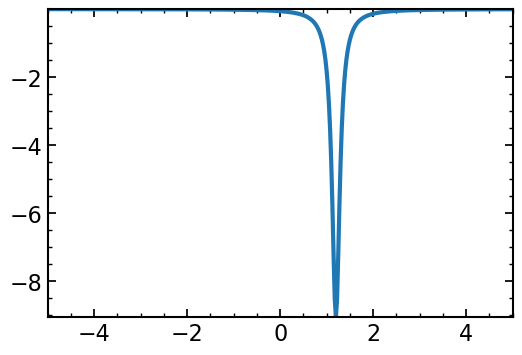

In [63]:
plt.plot(erange, imag(channels_AA.channels['aa3'].chs[0].G2[:, 0]))
# plt.plot(erange, imag(G2_AA[:, 0]), ls=':')

## 1-channel test

In [64]:
chs = channels_QA

In [65]:
ch = chs['qa1'].chs[0]

In [66]:
TM = channels_QA.get_T()

In [67]:
# TM = ch.TM.copy()
TM[erange < 0] = real(TM[erange < 0])

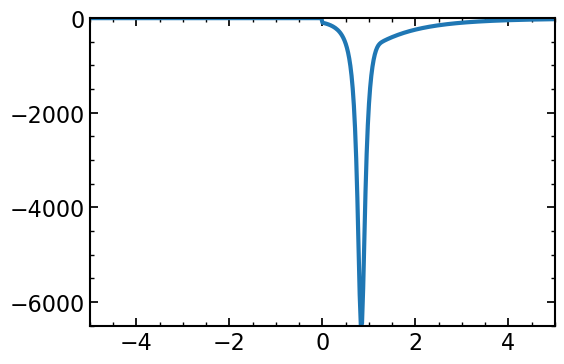

In [68]:
plt.plot(erange, imag(TM[:, 0]))

### Check Born term

In [88]:
T_born = array([[ch.Nf*ch.da*ch.ds / ch.p_i.d * -4*pi* ch.v(q)**2 for q in qrange] for e in erange])

In [89]:
T_born

array([[-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03],
       [-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03],
       [-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03],
       ...,
       [-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03],
       [-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03],
       [-1.06185832e+03, -1.04924372e+03, -1.01258575e+03, ...,
        -1.60012037e-03, -1.53747543e-03, -1.47766871e-03]])

In [90]:
iImT = tm.Interpolator(erange, ascontiguousarray(imag(TM[:, 0])), 'cubic')

In [91]:
ReT_KK = array([tm.ReSigmaKK(e, iImT) for e in erange])

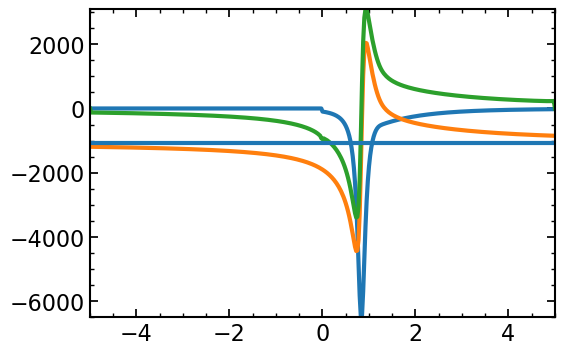

In [95]:
plt.plot(erange, imag(TM[:, 0]))
plt.plot(erange, real(TM[:, 0]))
plt.plot(erange, ReT_KK)
plt.axhline(T_born[0, 0])

# plt.plot(erange, ReT_KK + T_born, ls='--')

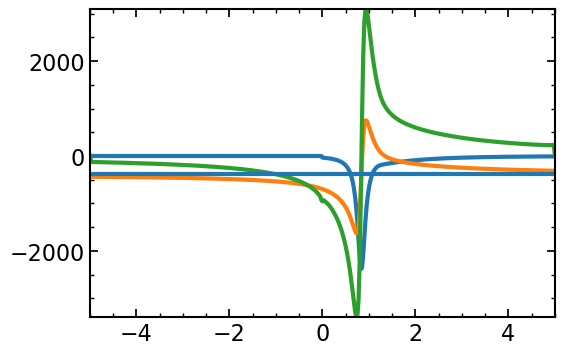

In [96]:
plt.plot(erange, imag(TM[:, 10]))
plt.plot(erange, real(TM[:, 10]))
plt.plot(erange, ReT_KK)
plt.axhline(T_born[0, 10])

# plt.plot(erange, ReT_KK + T_born, ls='--')

### Calculate $\Sigma$

In [97]:
iEps = tm.Interpolator(qrange, sqrt(qrange**2 + mQ**2), 'cubic')

In [98]:
# iImTM = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/TM), posinf=0, neginf=0)), 
#             ascontiguousarray(nan_to_num(imag(1/TM), posinf=0, neginf=0)), 'imag')
# iReTM = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/TM), posinf=0, neginf=0)), 
#             ascontiguousarray(nan_to_num(imag(1/TM), posinf=0, neginf=0)), 'real')

In [99]:
iImTM = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(TM)))
iReTM = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(TM)))

In [100]:
iReTM_subs = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(TM) - T_born))

In [101]:
ReTM_B = T_born
ReTM_B.shape

(401, 151)

In [102]:
iReTM_B = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReTM_B))

In [103]:
tm.SigmaQP(mQ, 0, T, iReTM, quark_run.R, iEps, iEps, 0, 0)

0.008091641843985194

In [104]:
tm.SigmaQP(mQ, 0, T, iImTM, quark_run.R, iEps, iEps, 0, 0)

-0.04980451439240419

Check the energy dependence

In [105]:
re = array([tm.SigmaQP(e, 0, T, iReTM, quark_run.R, iEps, iEps, 0, 0) for e in erange])
im = array([tm.SigmaQP(e, 0, T, iImTM, quark_run.R, iEps, iEps, 0, 0) for e in erange])

In [106]:
re_B = array([tm.SigmaQP(e, 0, T, iReTM_B, quark_run.R, iEps, iEps, 0, 0) for e in erange])

In [107]:
re_subs = array([tm.SigmaQP(e, 0, T, iReTM_subs, quark_run.R, iEps, iEps, 0, 0) for e in erange])

In [108]:
iIm = tm.Interpolator(erange, im, 'cubic')

In [109]:
re_kk = array([tm.ReSigmaKK(e, iIm) for e in erange])

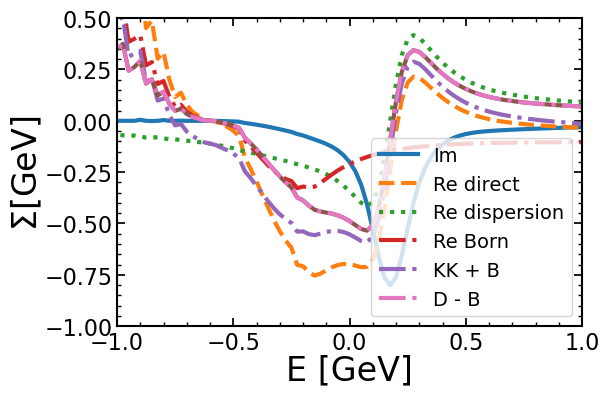

In [110]:
plt.plot(erange, im, label='Im')
plt.plot(erange, re, ls='--', label='Re direct')
plt.plot(erange, re_kk, ls=':', label='Re dispersion')

plt.plot(erange, re_B, ls='-.', label='Re Born')
plt.plot(erange, re_B + re_kk, ls='-.', label='KK + B')
plt.plot(erange, re_subs)
plt.plot(erange, re - re_B, ls='-.', label='D - B')

plt.xlim(-1, 1)
plt.ylim(-1, 0.5)

plt.xlabel('E [GeV]')
plt.ylabel(r'$\Sigma [GeV]$')
plt.legend(fontsize=14)

# plt.savefig('re_compare.pdf', bbox_inches='tight')